In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
df = pd.read_csv("/content/drive/MyDrive/BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


<class 'pandas.core.frame.DataFrame'>
                 Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014


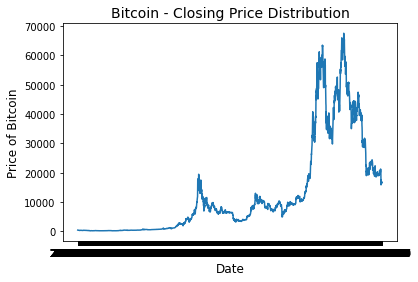

In [6]:
df1 = df[['Date','Close']]
df2 = df1.set_index('Date')
df2.sort_index(inplace=True)
print (type(df2))
print (df2.head())
plt.plot(df2)
plt.title("Bitcoin - Closing Price Distribution", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price of Bitcoin', fontsize=12)
plt.show()

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

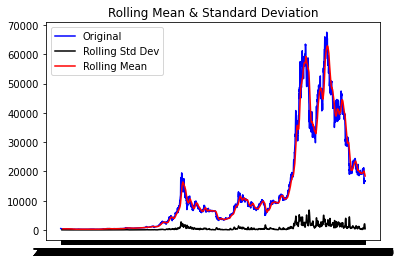

p-value: 0.468805
ADF Stastistic: -1.627489
The graph is non stationary


In [19]:

# Function to test the stationarity of the data
def stationary_test(x):


    rstd = x.rolling(window=12,center=False).std()
    rmean = x.rolling(window=22,center=False).mean()
    
    
    #Plotting the mean and standard deviation:
    orig = plt.plot(x, color='blue',label = 'Original')
    std = plt.plot(rstd, color='black', label = 'Rolling Std Dev')
    mean = plt.plot(rmean, color='red', label ='Rolling Mean')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block = False)
    



    #ADF test 

    soln = adfuller(x)
    pvalue = soln[1]
    print('p-value: %f'%soln[1])
    print('ADF Stastistic: %f'%soln[0])
    
    for k,v in soln[4].items():
         if soln[0] > v:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
       
df_close = df2['Close']      
stationary_test(df_close)

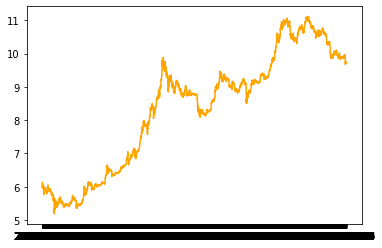

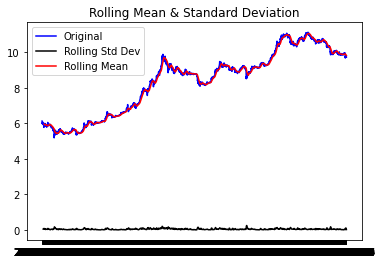

p-value: 0.746335
ADF Stastistic: -1.018830
The graph is non stationary


In [22]:
log_df = np.log(df_close)
plt.plot(log_df,color="orange")
plt.show()

stationary_test(log_df)

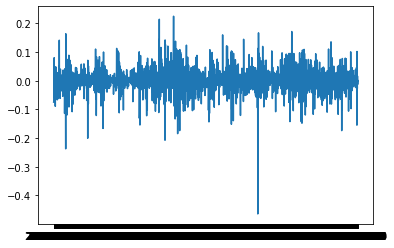

In [23]:
diff_log_df = log_df - log_df.shift()
plt.plot(diff_log_df)
plt.show()

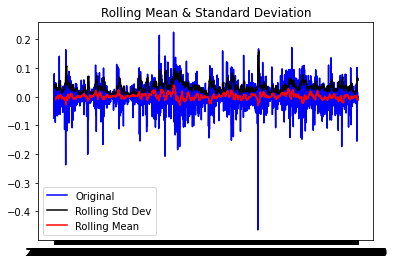

p-value: 0.000000
ADF Stastistic: -55.733377
The graph is stationary


In [24]:
diff_log_df.dropna(inplace=True)
stationary_test(diff_log_df)

In [27]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [29]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_df, order = (2,1,0))  
ARIMA_results = model.fit(disp = -1)  
ARIMA_results

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [31]:
df_len = int(len(log_df)-100)
data_train, data_test = log_df[0:df_len], log_df[df_len:len(log_df)]
data_train

Date
2014-09-17     6.125414
2014-09-18     6.050771
2014-09-19     5.978369
2014-09-20     6.013480
2014-09-21     5.988513
                ...    
2022-08-08    10.077839
2022-08-09    10.050368
2022-08-10    10.083625
2022-08-11    10.084038
2022-08-12    10.102454
Name: Close, Length: 2887, dtype: float64

expected = 24424.068359, predicted = 24428.316671, error = 0.017394  %
expected = 24319.333984, predicted = 24460.699996, error = 0.581291  %
expected = 24136.972656, predicted = 24355.398878, error = 0.904945  %
expected = 23883.291016, predicted = 24173.379619, error = 1.214609  %
expected = 23335.998047, predicted = 23920.100230, error = 2.503009  %
expected = 23212.738281, predicted = 23376.906291, error = 0.707232  %
expected = 20877.552734, predicted = 23243.484255, error = 11.332418  %
expected = 21166.060547, predicted = 20946.624710, error = 1.036734  %
expected = 21534.121094, predicted = 21172.812715, error = 1.677841  %
expected = 21398.908203, predicted = 21558.040029, error = 0.743645  %
expected = 21528.087891, predicted = 21432.770013, error = 0.442761  %
expected = 21395.019531, predicted = 21553.687943, error = 0.741614  %
expected = 21600.904297, predicted = 21427.201425, error = 0.804146  %
expected = 20260.019531, predicted = 21625.129314, error = 6.737949  %
expec

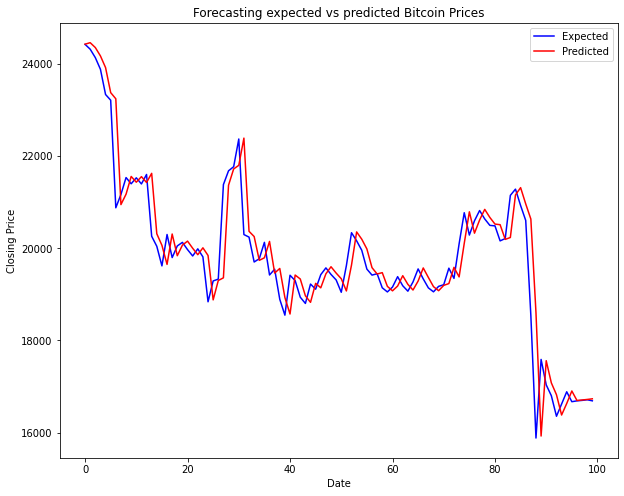

In [36]:
df_len = int(len(log_df)-100)
data_train, data_test = log_df[0:df_len], log_df[df_len:len(log_df)]
orig = list()
data = [d for d in data_train]
err = list()
pred = list()
for t in range(len(data_test)):
    model = ARIMA(data, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    op = model_fit.forecast()
    
    prediction = op[0]
    
        
    orig_val = data_test[t]
    data.append(orig_val)
    
    prediction = np.exp(prediction)
    
    
    orig_val = np.exp(orig_val)
    
    # Mean Absolute Error
    error = ((abs(prediction - orig_val)) / orig_val) * 100
    err.append(error)
    print('expected = %f, predicted = %f, error = %f ' % (orig_val, prediction, error), '%')
    
    orig.append(float(orig_val))
    pred.append(float(prediction))
    
      
print('\n Mean absolute error in predicting test data : %f ' % (sum(err)/float(len(err))), '%')

plt.figure(figsize=(10, 8))
data_t = [t for t in range(len(data_test))]
labels={'Expected','Predicted'}
plt.plot(data_t, orig, color = 'blue')
plt.plot(data_t, pred, color= 'red')
plt.title('Forecasting expected vs predicted Bitcoin Prices')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend(labels)
plt.show()

In [34]:
from sklearn.metrics import r2_score

r2_score(pred,orig)

0.8552631152433396